In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv(r"C:\Users\sanjay.b.s\Downloads\mlCie!\heis_usa.csv");

In [5]:
data.head


<bound method NDFrame.head of           id        region                                               name  \
0     222178         Texas                       Abilene Christian University   
1     497037         Texas  Abilene Christian University-Undergraduate Online   
2     488031    California                         Abraham Lincoln University   
3     172866     Minnesota                                    Academy College   
4     108232    California                          Academy of Art University   
...      ...           ...                                                ...   
1973  181853      Nebraska                                       York College   
1974  217059  Pennsylvania                       York College of Pennsylvania   
1975  141361       Georgia                               Young Harris College   
1976  206695          Ohio                        Youngstown State University   
1977  458575    California                                    Zaytuna College  

In [6]:
df = pd.DataFrame(data)

In [8]:
# --- Step 2: Encode Categorical Variables ---
le_region = LabelEncoder()
le_category = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['region'])
df['Category_encoded'] = le_category.fit_transform(df['category'])  # Target


In [9]:
# --- Step 3: Define Features and Target ---
X = df[['Region_encoded']]
y = df['Category_encoded']  # 0 = Public, 1 = Private


In [20]:
# --- Step 4: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [21]:
# --- Step 5: KNN Model ---
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])


In [22]:
# --- Step 6: Decision Tree Model ---
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])


In [23]:
print("=== KNN Evaluation ===")
print("KNN Metrics:")
print(f"  Accuracy: {knn_acc:.2f}")
print(f"  F1 Score: {knn_f1:.2f}")
print(f"  AUC Score: {knn_auc:.2f}")

=== KNN Evaluation ===
KNN Metrics:
  Accuracy: 0.70
  F1 Score: 0.25
  AUC Score: 0.55


In [24]:
print("\n=== Decision Tree ===")
print("Decision Tree Metrics:")
print(f"  Accuracy: {dt_acc:.2f}")
print(f"  F1 Score: {dt_f1:.2f}")
print(f"  AUC Score: {dt_auc:.2f}")


=== Decision Tree ===
Decision Tree Metrics:
  Accuracy: 0.70
  F1 Score: 0.15
  AUC Score: 0.57


In [25]:
# --- Step 7: Visualization ---
labels = ['Accuracy', 'F1 Score', 'AUC']
knn_metrics = [knn_acc, knn_f1, knn_auc]
dt_metrics = [dt_acc, dt_f1, dt_auc]


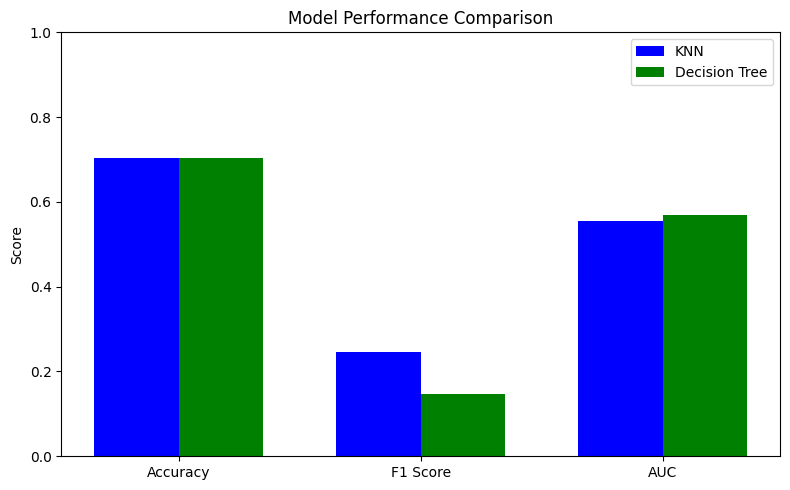

In [26]:
x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], knn_metrics, width=width, label='KNN', color='blue')
plt.bar([i + width/2 for i in x], dt_metrics, width=width, label='Decision Tree', color='green')
plt.xticks(ticks=x, labels=labels)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()